In [7]:
import numpy as np
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

# CASE 1: If the class targets are just returned as numbers then we use python advanced indexing

In [8]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

# Here the lables are represented by just numbers where:
# 0 -> Red
# 1 -> Green
# 2 -> Blue
class_targets = [0, 1, 1] # This means the class targets are [Red, Green, Green] which are the actual outputs
print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


# Printing the cross entropy loss value for each taget prediction

In [9]:
print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))

[0.35667494 0.69314718 0.10536052]


# Finding the mean cross entropy loss value

In [10]:
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


# CASE 2: If the data is ONE HOT ENCODED then this is how we will extract the relevant predictions

In [11]:
y_true_check = np.array([[1, 0, 0],
                         [0, 1, 0],
                         [0, 1, 0]])

y_pred_clipped_check = np.array([[0.7, 0.1, 0.2],
                                 [0.1, 0.5, 0.4],
                                 [0.02, 0.9, 0.08]])

element_wise_multiplication = y_true_check*y_pred_clipped_check
print("After element wise multiplication: ")
print(element_wise_multiplication)

class_targets = np.sum(element_wise_multiplication, axis=1)
print("Class targets after array sumission column wise: ")
print(class_targets)

neg_loss = -np.log(class_targets)
print("Negative loss values for each output: ", neg_loss)

avg_loss = np.mean(neg_loss)
print("Mean loss: ", avg_loss)

After element wise multiplication: 
[[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]
Class targets after array sumission column wise: 
[0.7 0.5 0.9]
Negative loss values for each output:  [0.35667494 0.69314718 0.10536052]
Mean loss:  0.38506088005216804


# Clipping values

In [12]:
# Clipping doesn't let the value to be completely 1 and not completely 0, it keeps the values between 0 and 1
y_pred_clip = np.clip([[0.7, 0.1, 0.2],
                       [1, 0.5, 0.4],
                       [0.02, 0.9, 0.08]], 1e-7, 1 - 1e-7)
print(y_pred_clip)

[[0.7       0.1       0.2      ]
 [0.9999999 0.5       0.4      ]
 [0.02      0.9       0.08     ]]


# Implementign the Loss Class

In [13]:
class Loss:
    def calculate(self, y_pred, y_true):
        neg_loss_liklihoods = self.forward(y_pred, y_true)
        avg_loss = np.mean(neg_loss_liklihoods)
        return avg_loss

# Implementing the Categorical Cross Entropy Class

In [14]:
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(len(y_pred_clipped)), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        neg_loss_liklihoods = -np.log(correct_confidences)

        return neg_loss_liklihoods

In [15]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 1, 0]])

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print("Loss: ", loss)

Loss:  0.38506088005216804


# Coding a whole forwards pass with loss function

In [16]:
# RELU Activation Function
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

In [17]:
# Softmax Activation Function
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

In [18]:
# Dense Layer Class
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.n_inputs = n_inputs
    self.n_neurons = n_neurons
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

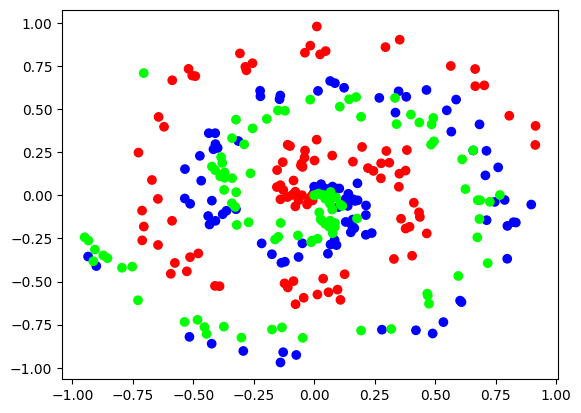

In [20]:
# Importing the spiral dataset
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [26]:
# Coding the whole neural network pass using the loss function
layer_dense1 = Layer_Dense(2, 3)
relu_activation = Activation_ReLU()

layer_dense2 = Layer_Dense(3, 3)
softmax_activation = Activation_Softmax()

layer_dense1.forward(X)
relu_activation.forward(layer_dense1.output)
layer_dense2.forward(relu_activation.output)
softmax_activation.forward(layer_dense2.output)

print(softmax_activation.output[:5])
print("Loss: ", loss_function.calculate(softmax_activation.output, y))

[[0.33333333 0.33333333 0.33333333]
 [0.33333328 0.33333362 0.3333331 ]
 [0.3333332  0.33333399 0.33333281]
 [0.33333312 0.33333444 0.33333244]
 [0.33333304 0.33333484 0.33333212]]
Loss:  1.0986077619254786


In [32]:
class_targets = np.array([0, 1, 1])
softmax_outputs = np.array([[0.1, 0.7, 0.2],
                            [0.02, 0.9, 0.08]])
correct_predictions = np.argmax(softmax_outputs, axis=1)
print(correct_predictions)

if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)

accuracy = np.mean(correct_predictions == class_targets)
print(correct_predictions == class_targets)
print(accuracy)

[1 1 1]
[False  True  True]
0.6666666666666666
